📁 UPLOADING YOUR DATA...


Saving noncommunicable_diseases_indicators_btn.csv to noncommunicable_diseases_indicators_btn (5).csv
✅ Data loaded: noncommunicable_diseases_indicators_btn (5).csv
📊 Shape: (4193, 17)
📋 Columns: ['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'YEAR (DISPLAY)', 'STARTYEAR', 'ENDYEAR', 'REGION (CODE)', 'REGION (DISPLAY)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)', 'DIMENSION (TYPE)', 'DIMENSION (CODE)', 'DIMENSION (NAME)', 'Numeric', 'Value', 'Low', 'High']

🔍 STEP 1: CLEANING COLUMN NAMES
----------------------------------------
📋 Cleaned column names:
 1. gho_code
 2. gho_display
 3. gho_url
 4. year_display
 5. startyear
 6. endyear
 7. region_code
 8. region_display
 9. country_code
10. country_display
11. dimension_type
12. dimension_code
13. dimension_name
14. numeric
15. value
16. low
17. high

📊 STEP 2: CHECKING DATA STRUCTURE
----------------------------------------
🔍 Looking for key columns...
📅 Year columns: ['year_display', 'startyear', 'endyear']
📈 Value columns: ['numeric', 'valu

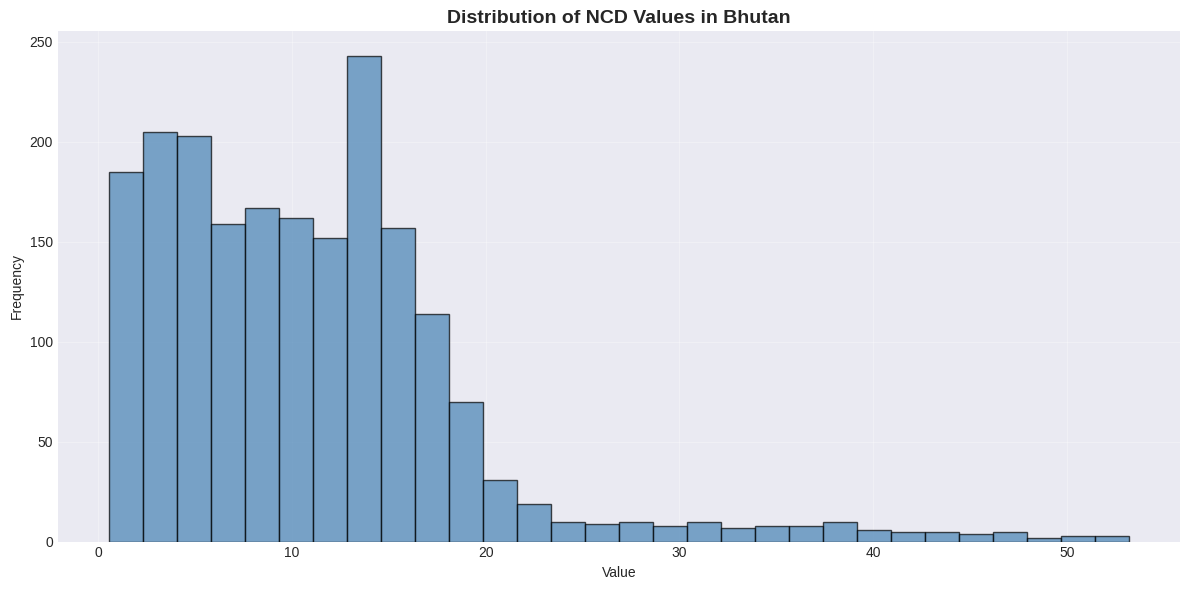

📊 Value Statistics:
  Mean: 11.09
  Median: 10.05
  Std Dev: 8.20
  Min: 0.55
  Max: 53.19


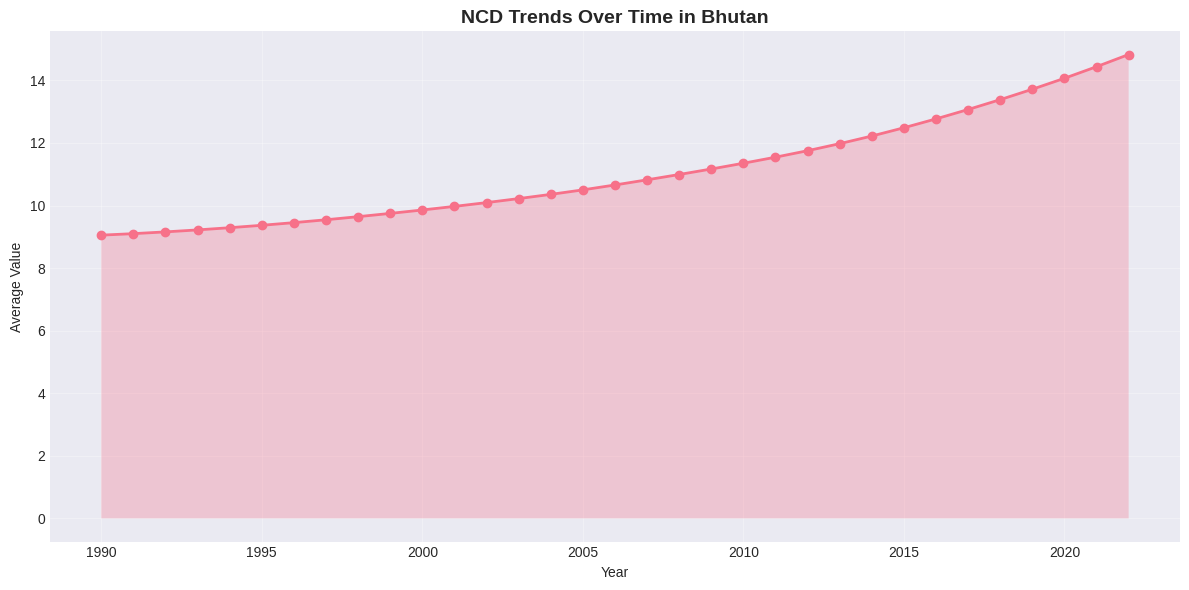


📅 Yearly Trend Analysis:
  From 1990.0 to 2022.0
  Change: +63.8%


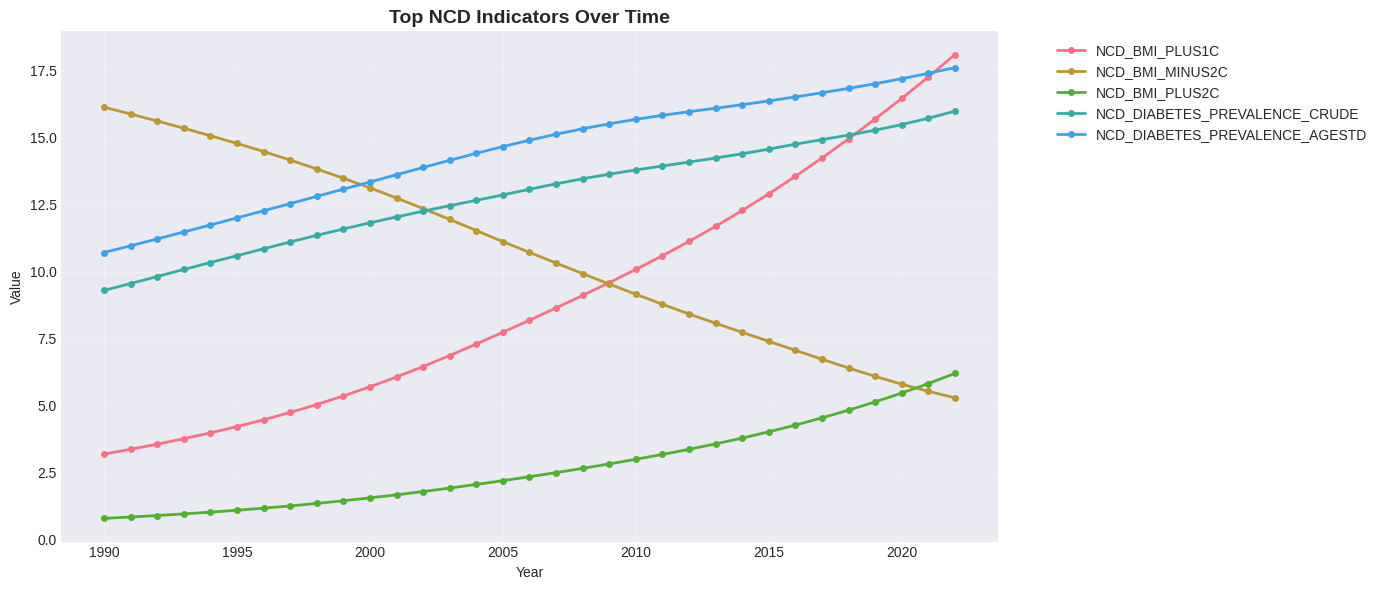

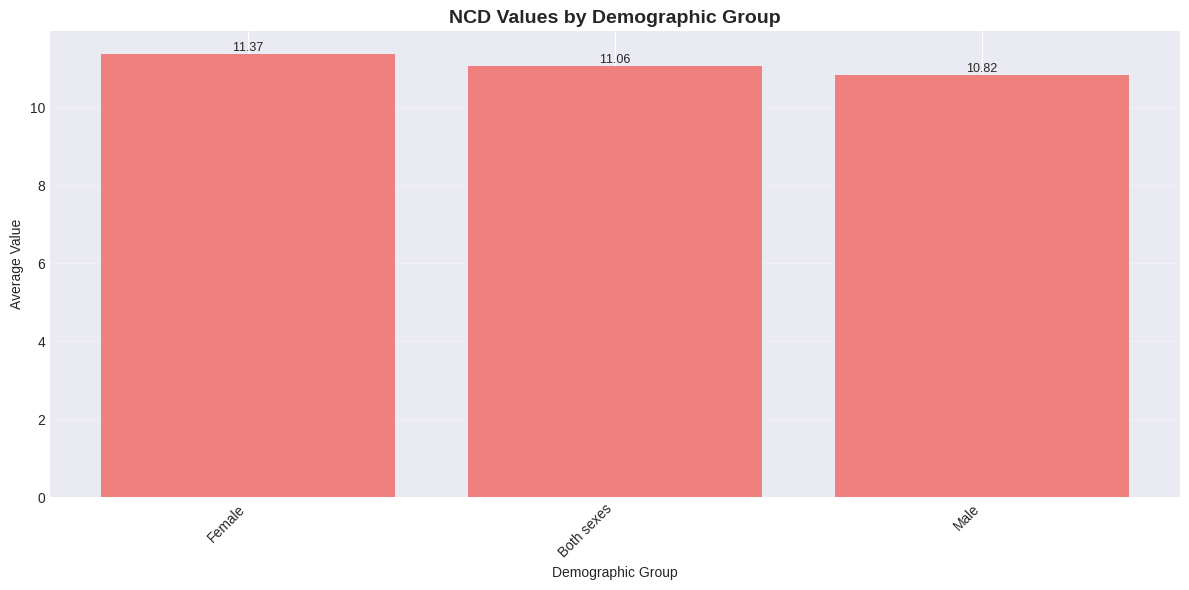


👥 Demographic Analysis:
  Groups: 3
  Highest: Female = 11.37
  Lowest: Male = 10.82

💾 STEP 7: SAVING RESULTS
----------------------------------------
✅ Saved: processed_ncd_data.csv
✅ Saved: summary_report.txt
✅ Saved: main_chart.png
updating: content/bhutan_ncd_analysis/main_chart.png (deflated 22%)
updating: content/bhutan_ncd_analysis/processed_ncd_data.csv (deflated 84%)
updating: content/bhutan_ncd_analysis/summary_report.txt (deflated 34%)

📦 FILES READY FOR DOWNLOAD:
1. processed_ncd_data.csv - Clean NCD data for Part 5
2. summary_report.txt - Analysis summary
3. main_chart.png - Key visualization
4. bhutan_ncd_analysis.zip - All files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

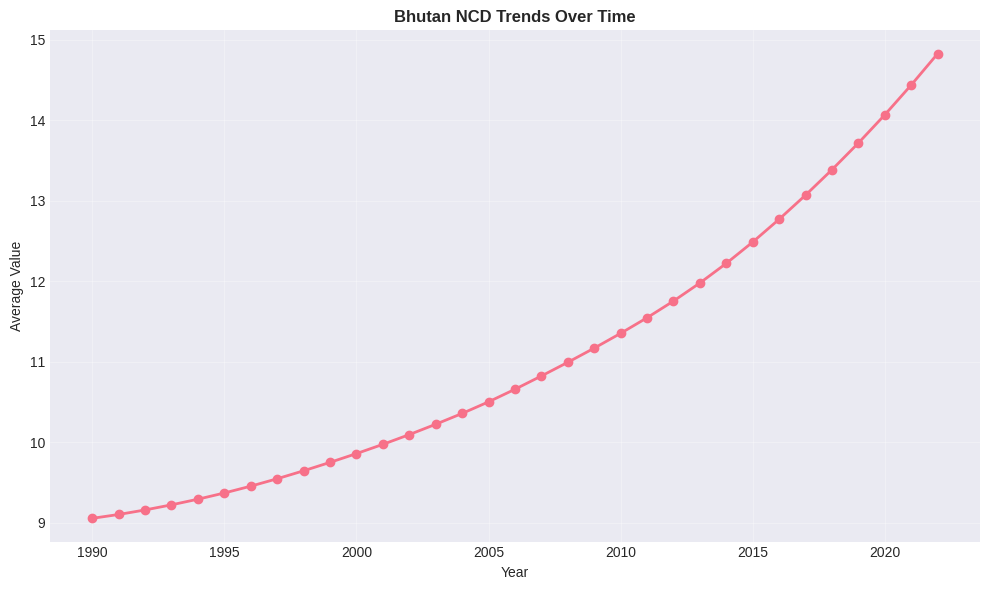

In [ ]:
# Upload your data
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

print("📁 UPLOADING YOUR DATA...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"✅ Data loaded: {filename}")
print(f"📊 Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# 1. CLEAN COLUMN NAMES
print("\n🔍 STEP 1: CLEANING COLUMN NAMES")
print("-" * 40)

# Clean column names (remove special characters, spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('#', '').str.replace('+', '_')

print("📋 Cleaned column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# 2. CHECK YOUR SPECIFIC COLUMNS
print("\n📊 STEP 2: CHECKING DATA STRUCTURE")
print("-" * 40)

# Let's see what columns we actually have
print("🔍 Looking for key columns...")

# Find year column
year_cols = [col for col in df.columns if 'year' in col]
print(f"📅 Year columns: {year_cols}")

# Find value column (Numeric)
value_cols = [col for col in df.columns if 'numeric' in col or 'value' in col]
print(f"📈 Value columns: {value_cols}")

# Find indicator column
indicator_cols = [col for col in df.columns if 'gho' in col or 'indicator' in col]
print(f"🏥 Indicator columns: {indicator_cols}")

# Find demographic column
demo_cols = [col for col in df.columns if 'dimension' in col and 'name' in col]
print(f"👥 Demographic columns: {demo_cols}")

# 3. SELECT THE RIGHT COLUMNS
print("\n🎯 STEP 3: SELECTING COLUMNS FOR ANALYSIS")
print("-" * 40)

# Use the first available column for each type
year_col = year_cols[0] if year_cols else None
value_col = value_cols[0] if value_cols else None
indicator_col = indicator_cols[0] if indicator_cols else None
demo_col = demo_cols[0] if demo_cols else None

print(f"📅 Using year column: {year_col}")
print(f"📊 Using value column: {value_col}")
print(f"🏥 Using indicator column: {indicator_col}")
print(f"👥 Using demographic column: {demo_col}")

# 4. PREPARE DATA
print("\n🧹 STEP 4: PREPARING DATA")
print("-" * 40)

# Select only the columns we need
selected_cols = []
if year_col: selected_cols.append(year_col)
if value_col: selected_cols.append(value_col)
if indicator_col: selected_cols.append(indicator_col)
if demo_col: selected_cols.append(demo_col)

df_clean = df[selected_cols].copy()

# Rename for easier use
rename_dict = {}
if year_col: rename_dict[year_col] = 'year'
if value_col: rename_dict[value_col] = 'value'
if indicator_col: rename_dict[indicator_col] = 'indicator'
if demo_col: rename_dict[demo_col] = 'demographic'

df_clean = df_clean.rename(columns=rename_dict)

print(f"📊 Selected {len(df_clean.columns)} columns:")
for col in df_clean.columns:
    print(f"  • {col}: {df_clean[col].dtype}")

# Convert to proper types
if 'year' in df_clean.columns:
    df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
if 'value' in df_clean.columns:
    df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')

# Remove rows with missing values
df_clean = df_clean.dropna()

print(f"\n✅ Clean data shape: {df_clean.shape}")
if 'year' in df_clean.columns:
    print(f"📅 Year range: {df_clean['year'].min():.0f} - {df_clean['year'].max():.0f}")
if 'value' in df_clean.columns:
    print(f"📊 Value range: {df_clean['value'].min():.2f} - {df_clean['value'].max():.2f}")
if 'indicator' in df_clean.columns:
    print(f"🏥 Unique indicators: {df_clean['indicator'].nunique()}")
    print(f"\n📋 Sample indicators:")
    for indicator in df_clean['indicator'].unique()[:5]:
        print(f"  • {indicator}")

# 5. FILTER FOR NCD DATA
print("\n🎯 STEP 5: FILTERING FOR NCD INDICATORS")
print("-" * 40)

if 'indicator' in df_clean.columns:
    # Convert to lowercase for searching
    df_clean['indicator_lower'] = df_clean['indicator'].astype(str).str.lower()

    # NCD keywords to search for
    ncd_keywords = [
        'cholest', 'alcohol', 'blood', 'cardiovasc', 'heart',
        'diabetes', 'hypertension', 'stroke', 'cancer',
        'chronic', 'obesity', 'overweight', 'bmi',
        'tobacco', 'smoking', 'asthma', 'copd',
        'respiratory', 'mental', 'depression'
    ]

    # Create search pattern
    ncd_mask = df_clean['indicator_lower'].str.contains('|'.join(ncd_keywords), na=False)
    ncd_data = df_clean[ncd_mask].copy()

    print(f"📊 Total records: {len(df_clean):,}")
    print(f"🎯 NCD records found: {len(ncd_data):,} ({len(ncd_data)/len(df_clean)*100:.1f}%)")

    if len(ncd_data) > 0:
        print(f"🏥 Unique NCD indicators: {ncd_data['indicator'].nunique()}")

        # Show top NCD indicators
        print("\n🔍 TOP NCD INDICATORS:")
        top_indicators = ncd_data['indicator'].value_counts().head(10)
        for i, (indicator, count) in enumerate(top_indicators.items(), 1):
            print(f"{i:2d}. {indicator[:60]}... (n={count})")
    else:
        print("⚠️ No NCD indicators found! Using all data.")
        ncd_data = df_clean.copy()
else:
    print("⚠️ No indicator column found! Using all data.")
    ncd_data = df_clean.copy()

# 6. CREATE VISUALIZATIONS
print("\n📈 STEP 6: CREATING VISUALIZATIONS")
print("-" * 40)

if len(ncd_data) > 0 and 'value' in ncd_data.columns:
    plt.style.use('seaborn-v0_8-darkgrid')

    # Chart 1: Distribution of values
    plt.figure(figsize=(12, 6))
    plt.hist(ncd_data['value'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    plt.title('Distribution of NCD Values in Bhutan', fontweight='bold', fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"📊 Value Statistics:")
    print(f"  Mean: {ncd_data['value'].mean():.2f}")
    print(f"  Median: {ncd_data['value'].median():.2f}")
    print(f"  Std Dev: {ncd_data['value'].std():.2f}")
    print(f"  Min: {ncd_data['value'].min():.2f}")
    print(f"  Max: {ncd_data['value'].max():.2f}")

    # Chart 2: Year trends (if year column exists)
    if 'year' in ncd_data.columns:
        plt.figure(figsize=(12, 6))

        # Calculate yearly average
        yearly_avg = ncd_data.groupby('year')['value'].mean().reset_index()

        plt.plot(yearly_avg['year'], yearly_avg['value'], marker='o', linewidth=2, markersize=6)
        plt.fill_between(yearly_avg['year'], yearly_avg['value'], alpha=0.3)

        plt.title('NCD Trends Over Time in Bhutan', fontweight='bold', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Average Value')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print(f"\n📅 Yearly Trend Analysis:")
        if len(yearly_avg) >= 2:
            start_val = yearly_avg['value'].iloc[0]
            end_val = yearly_avg['value'].iloc[-1]
            change_pct = ((end_val - start_val) / start_val * 100) if start_val != 0 else 0
            print(f"  From {yearly_avg['year'].iloc[0]} to {yearly_avg['year'].iloc[-1]}")
            print(f"  Change: {change_pct:+.1f}%")

    # Chart 3: Top indicators comparison
    if 'indicator' in ncd_data.columns:
        # Get top 5 indicators
        top_5 = ncd_data['indicator'].value_counts().head(5).index

        plt.figure(figsize=(14, 6))

        for indicator in top_5:
            ind_data = ncd_data[ncd_data['indicator'] == indicator]
            if 'year' in ind_data.columns:
                yearly_ind = ind_data.groupby('year')['value'].mean().reset_index()
                plt.plot(yearly_ind['year'], yearly_ind['value'], marker='o',
                        linewidth=2, markersize=4, label=indicator[:30])

        plt.title('Top NCD Indicators Over Time', fontweight='bold', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Chart 4: Demographic breakdown (if available)
    if 'demographic' in ncd_data.columns and ncd_data['demographic'].nunique() > 1:
        plt.figure(figsize=(12, 6))

        # Get average by demographic group
        demo_avg = ncd_data.groupby('demographic')['value'].mean().sort_values(ascending=False)

        bars = plt.bar(range(len(demo_avg)), demo_avg.values, color='lightcoral')
        plt.xticks(range(len(demo_avg)), demo_avg.index, rotation=45, ha='right')
        plt.title('NCD Values by Demographic Group', fontweight='bold', fontsize=14)
        plt.xlabel('Demographic Group')
        plt.ylabel('Average Value')
        plt.grid(axis='y', alpha=0.3)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

        print(f"\n👥 Demographic Analysis:")
        print(f"  Groups: {len(demo_avg)}")
        print(f"  Highest: {demo_avg.index[0]} = {demo_avg.iloc[0]:.2f}")
        print(f"  Lowest: {demo_avg.index[-1]} = {demo_avg.iloc[-1]:.2f}")

# 7. SAVE RESULTS
print("\n💾 STEP 7: SAVING RESULTS")
print("-" * 40)

import os

# Create output directory
os.makedirs('/content/bhutan_ncd_analysis', exist_ok=True)

# Save processed data
ncd_data.to_csv('/content/bhutan_ncd_analysis/processed_ncd_data.csv', index=False)
print("✅ Saved: processed_ncd_data.csv")

# Create summary
summary = f"""
BHUTAN NCD ANALYSIS REPORT
==========================
Data Source: {filename}
Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

DATA OVERVIEW:
- Total records: {len(df):,}
- Clean records: {len(df_clean):,}
- NCD records: {len(ncd_data):,}

COLUMNS USED:
- Year: {year_col}
- Value: {value_col}
- Indicator: {indicator_col}
- Demographic: {demo_col}

ANALYSIS RESULTS:
- Year range: {df_clean['year'].min():.0f} - {df_clean['year'].max():.0f} (if available)
- Value range: {df_clean['value'].min():.2f} - {df_clean['value'].max():.2f} (if available)
- Unique indicators: {df_clean['indicator'].nunique() if 'indicator' in df_clean.columns else 'N/A'}
"""

with open('/content/bhutan_ncd_analysis/summary_report.txt', 'w') as f:
    f.write(summary)
print("✅ Saved: summary_report.txt")

# Save the main chart
if 'value' in ncd_data.columns:
    plt.figure(figsize=(10, 6))
    if 'year' in ncd_data.columns:
        yearly_avg = ncd_data.groupby('year')['value'].mean().reset_index()
        plt.plot(yearly_avg['year'], yearly_avg['value'], 'o-', linewidth=2, markersize=6)
        plt.title('Bhutan NCD Trends Over Time', fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Average Value')
    else:
        plt.hist(ncd_data['value'], bins=30, edgecolor='black', alpha=0.7)
        plt.title('Distribution of NCD Values in Bhutan', fontweight='bold')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('/content/bhutan_ncd_analysis/main_chart.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: main_chart.png")

# Create zip file
!zip -r /content/bhutan_ncd_analysis.zip /content/bhutan_ncd_analysis/*

print("\n📦 FILES READY FOR DOWNLOAD:")
print("1. processed_ncd_data.csv - Clean NCD data for Part 5")
print("2. summary_report.txt - Analysis summary")
print("3. main_chart.png - Key visualization")
print("4. bhutan_ncd_analysis.zip - All files")

# Download
from google.colab import files
files.download('/content/bhutan_ncd_analysis.zip')